# Memory Based Collaborative Filtering Recommender

The goal of the **recommender system** is to predict user preference for a set of items based on the past experience. Two the most popular approaches are Content-Based and Collaborative Filtering.

**Collaborative filtering** is a technique used by websites like Amazon, YouTube, and Netflix. It filters out items that a user might like on the basis of reactions of similar users. There are two categories of collaborative filtering algorithms: memory based and model based.

**Memory based algorithms** apply statistical techniques to the entire dataset to calculate the predictions. They can be divided into two main sections: user-item filtering and item-item filtering. The closest users or items are calculated only by using Cosine similarity or Pearson correlation coefficients, which are solely based on arithmetic operations.

The goal of this exercise is to compare user-item and item-item approach, try different configurations of parameters, optimize model performance and explore obtained results.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from surprise import Dataset, Reader
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

import functions as f

This analysis will focus on book recommendations based on [Book-Crossing dataset](http://www2.informatik.uni-freiburg.de/~cziegler/BX/). To reduce the dimensionality of the dataset and avoid running into memory error it will focus on users with at least 3 ratings and top 10% most frequently rated books. It consists of 176,594 records.

The recommender systems will be built using [surprise package](https://surprise.readthedocs.io/en/stable/getting_started.html#getting-started) (KNN-based models).

In [2]:
df = pd.read_csv('data/ratings_top.csv')

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df[['user_id', 'isbn', 'book_rating']], reader)

In [3]:
print('Number of ratings: %d\nNumber of books: %d\nNumber of users: %d' % (len(df), len(df['isbn'].unique()), len(df['user_id'].unique())))

Number of ratings: 176594
Number of books: 16766
Number of users: 20149


## KNN Model Selection

K-Nearest Neighbours algorithm calculates the distances between users or items and finds the closest ones = the most similar ones. Surprise package offers several variations of the model. The comparison of those models shows that KNNBaseline algorithm gives the best performance in terms of RMSE error and is not that time-consuming (compared to other models) when it comes to fitting it.

KNNBaseline model will be tested in further analysis with different similarity metrics and hyperparameters as well as user-item and item-item approach.

In [4]:
models1 = f.generate_models_dict([KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline], ['msd'], True)
results1 = f.cv_multiple_models(data, models1)
models1 = None
display(results1)


---> CV for KNNBasic msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithMeans msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNWithZScore msd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline msd...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimat

,fit_time,model,test_mae,test_rmse,test_time
0,18.759397,KNNBasic msd,1.496106,1.947808,4.292997
1,22.443044,KNNWithMeans msd,1.366099,1.824922,4.715832
2,25.521179,KNNWithZScore msd,1.348834,1.817319,4.503368
3,20.381712,KNNBaseline msd,1.359369,1.783068,4.735185


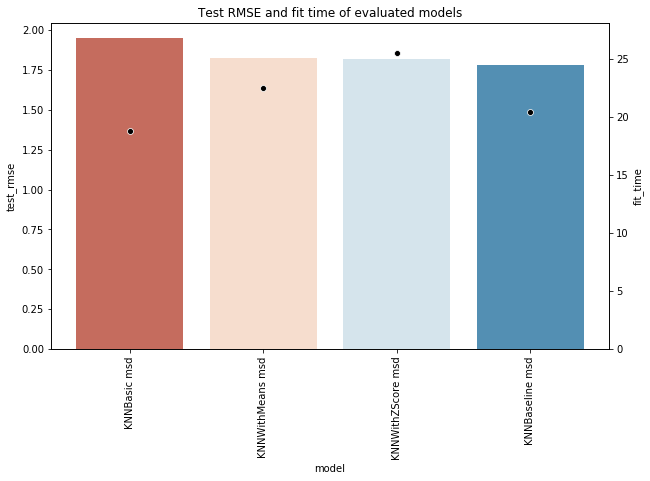

In [5]:
f.draw_model_results(results1)

## User-Item Model Selection

User-Item approach is to determine a set of the most similar users to the user U (based on their past ratings) and to calculate the rating for the item I based on the ratings assigned by those users.

After conducting the test of different similarity metrics for KNNBaseline (user-item) algorithm, it's clear that Pearson correlation coefficient is the best both in terms of RMSE and MAE (alhough it's the least time efficient when fitting it).

In [6]:
models2 = f.generate_models_dict([KNNBaseline], ['cosine', 'msd', 'pearson'], True)
results2 = f.cv_multiple_models(data, models2)
models2 = None
display(results2)


---> CV for KNNBaseline cosine...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline msd...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline pearson...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pea

,fit_time,model,test_mae,test_rmse,test_time
0,36.068179,KNNBaseline cosine,1.365077,1.779240,5.213969
1,19.213364,KNNBaseline msd,1.358349,1.780808,4.560174
2,38.958784,KNNBaseline pearson,1.315616,1.704551,3.976375


## Item-Item Model Selection

Item-Item approach is to determine a set of the most similar items to the item I (based on the past ratings of other users) and to calculate the rating for the item I based on the ratings of similar items rated by the user U.

As before, Pearson correlation coefficient gives the best results in terms of both RMSE and MAE. By using item-item approach the results of the algorithm were improved compared to the previous iteration.

In [11]:
models3 = f.generate_models_dict([KNNBaseline], ['cosine', 'msd', 'pearson'], False)
results3 = f.cv_multiple_models(data, models3)
models3 = None
display(results3)


---> CV for KNNBaseline cosine...
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline msd...
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.

---> CV for KNNBaseline pearson...
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pea

,fit_time,model,test_mae,test_rmse,test_time
0,31.533477,KNNBaseline cosine,1.270213,1.691894,9.560889
1,16.385783,KNNBaseline msd,1.277724,1.705066,9.301719
2,53.911460,KNNBaseline pearson,1.253583,1.647738,9.555055


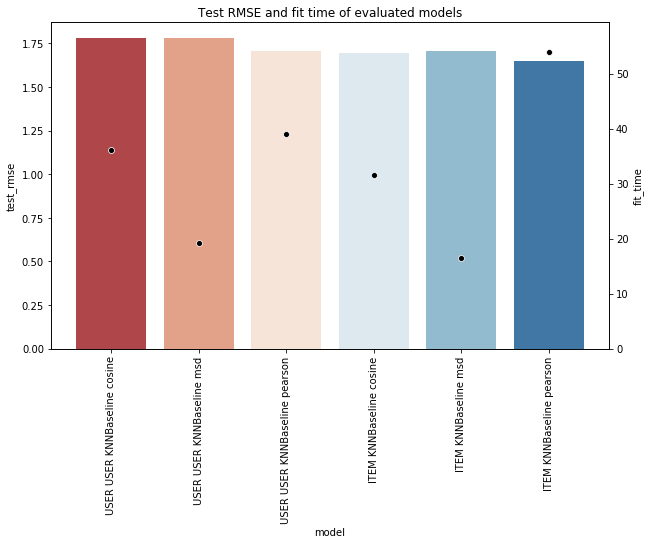

In [12]:
results2['model'] = 'USER ' + results2['model']
results3['model'] = 'ITEM ' + results3['model']

f.draw_model_results(pd.concat([results2, results3]))

## Memory Based Model Optimisation with GridSearch CV

Grid Search Cross Validation computes accuracy metrics for an algorithm on various combinations of parameters, over a cross-validation procedure. It's useful for finding the best configuration of parameters.

Iterating over different sets of parameters of KNNBaseline model shows that increasing k (the max number of neighbours to take into consideration in aggregation) and min_k (the minimum number of neighbors to take into account for aggregation) improves the RMSE score. At the same time, it's good to be aware that increasing those parameters extends the training time and may also lead to overfitting. The best set of parameters (in terms of RMSE) obtained by GridSearch:
* KNNBaseline, item-item, Pearson similarity metric
* k = 50
* min_k = 5
* min_support = 1

Optimization of KNNBaseline model may additionally be extended by playing with baseline estimates configuration.

In [13]:
param_grid = {'k': [40,45,50],
              'min_k': [1,3,5],
              'sim_options': {'name': ['pearson'],
                              'min_support': [1, 5],
                              'user_based': [False]}
              }
gs = GridSearchCV(KNNBaseline, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

#1.607153664460527
#{'k': 50, 'min_k': 5, 'sim_options': {'name': 'pearson', 'min_support': 1, 'user_based': False}}

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als.

## Analysis of Collaborative Filtering model results

In this part, let's examine in detail the results obtained by the KNN model that provided the best RMSE score.

In [20]:
trainset, testset = train_test_split(data, test_size=0.2)

sim_options = {
    'name': 'pearson',
    'user_based': False,
    'min_support': 1
}

model = KNNWithMeans(k=50, min_k=5, sim_options=sim_options)
model.fit(trainset)
predictions = model.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [21]:
df_pred = pd.DataFrame(predictions, columns=['user_id', 'isbn', 'actual_rating', 'pred_rating', 'details'])

df_pred['k'] = df_pred['details'].apply(f.k_from_details)
df_pred['impossible'] = df_pred['details'].apply(lambda x: x['was_impossible'])
df_pred['pred_rating_round'] = df_pred['pred_rating'].round()
df_pred['abs_err'] = abs(df_pred['pred_rating'] - df_pred['actual_rating'])
df_pred.drop(['details'], axis=1, inplace=True)

df_pred.sample(5)

,user_id,isbn,actual_rating,pred_rating,k,impossible,pred_rating_round,abs_err
1241,264027,0679445315,5.0,6.333333,0,False,6.0,1.333333
30914,193740,0064471837,8.0,8.666667,0,False,9.0,0.666667
31284,21252,0345433491,6.0,7.894737,1,False,8.0,1.894737
2241,11676,0440428130,9.0,8.714286,0,False,9.0,0.285714
24254,275827,0140071814,2.0,7.400000,0,False,7.0,5.400000


### Distribution of actual and predicted ratings in the test set

According to the distribution of actual ratings of books in the test set, the biggest part of users give positive scores - between 7 and 10. The mode equals 8 but count of ratings 7, 9, 10 is also noticeable.
The distribution of predicted ratings in the test set is visibly different. One more time, 8 is a mode but scores 7, 9 and 10 are clearly less frequent.

It shows that the recommender system is not perfect and it cannot reflect the real distribution of book ratings.

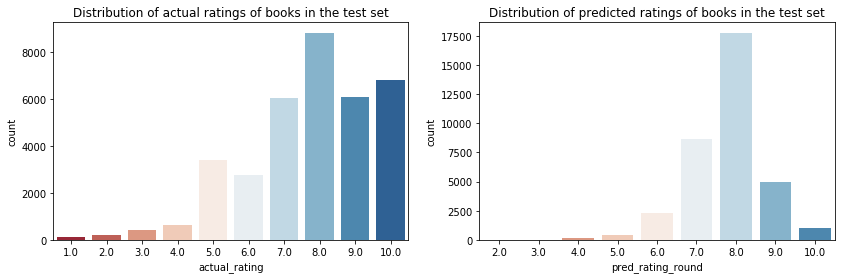

In [22]:
palette = sns.color_palette("RdBu", 10)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred, palette=palette, ax=ax1)
ax1.set_title('Distribution of actual ratings of books in the test set')

sns.countplot(x='pred_rating_round', data=df_pred, palette=palette, ax=ax2)
ax2.set_title('Distribution of predicted ratings of books in the test set')

plt.show()

### Absolute error of predicted ratings

The distribution of absolute errors is right-skewed, showing that the majority of errors is small: between 0 and 1. There is a long tail that indicates that there are several observations for which the absolute error was close to 10.

How good/bad the model is with predicting certain scores? As expected from the above charts, the model deals very well with predicting score = 8 (the most frequent value). The further the rating from score = 8, the higher the absolute error. The biggest errors happen to observations with scores 1 or 2 which indicates that probably the model is predicting high ratings for those observations. 

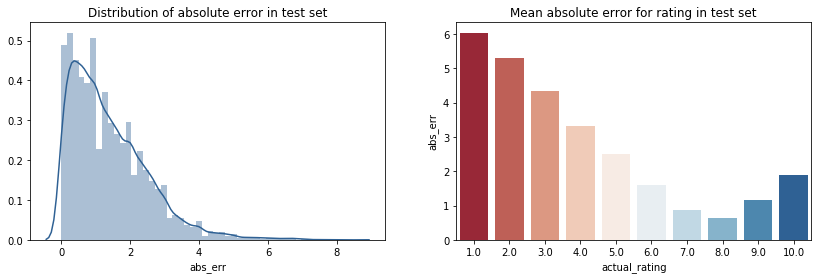

In [23]:
df_pred_err = df_pred.groupby('actual_rating')['abs_err'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.distplot(df_pred['abs_err'], color='#2f6194', ax=ax1)
ax1.set_title('Distribution of absolute error in test set')

sns.barplot(x='actual_rating', y='abs_err', data=df_pred_err, palette=palette, ax=ax2)
ax2.set_title('Mean absolute error for rating in test set')

plt.show()

### Analysis of predicted ratings of a particular user

For this part of the analysis, the user with id 204864 was selected. It can be noted that his rating behaviour is slightly different than the behaviour shown in scores' distribution of the whole population. He gives high scores often (7-10) and rating = 10 is the most frequent value.

The distribution of predicted book ratings for this user differs a lot from the actual one. All predicted ratings are between 6-10 (which shows that the model is mistaken for the observation with score 5) and the most frequent rating is 8 (which implies that probably some of the observations with the real score = 10 have predicted rating lower than actual).

In [24]:
df_books = pd.read_csv('data/books.csv')

df_pred_ext = df_pred.merge(df_books[['isbn', 'book_title']], on='isbn', how='left')
df_pred_ext['book_title_short'] = df_pred_ext['book_title'].apply(f.short_title)

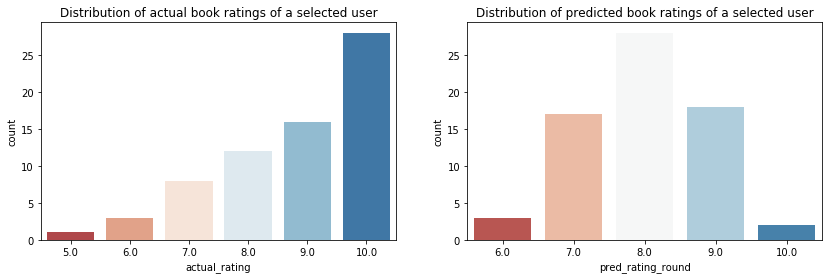

In [56]:
# Selected user: 204864
selected_user_id = 204864

df_pred_user = df_pred_ext[df_pred_ext['user_id']==selected_user_id]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

sns.countplot(x='actual_rating', data=df_pred_user, palette=sns.color_palette("RdBu", len(df_pred_user['actual_rating'].unique())), ax=ax1)
ax1.set_title('Distribution of actual book ratings of a selected user')

sns.countplot(x='pred_rating_round', data=df_pred_user, palette=sns.color_palette("RdBu", len(df_pred_user['pred_rating_round'].unique())), ax=ax2)
ax2.set_title('Distribution of predicted book ratings of a selected user')

plt.show()

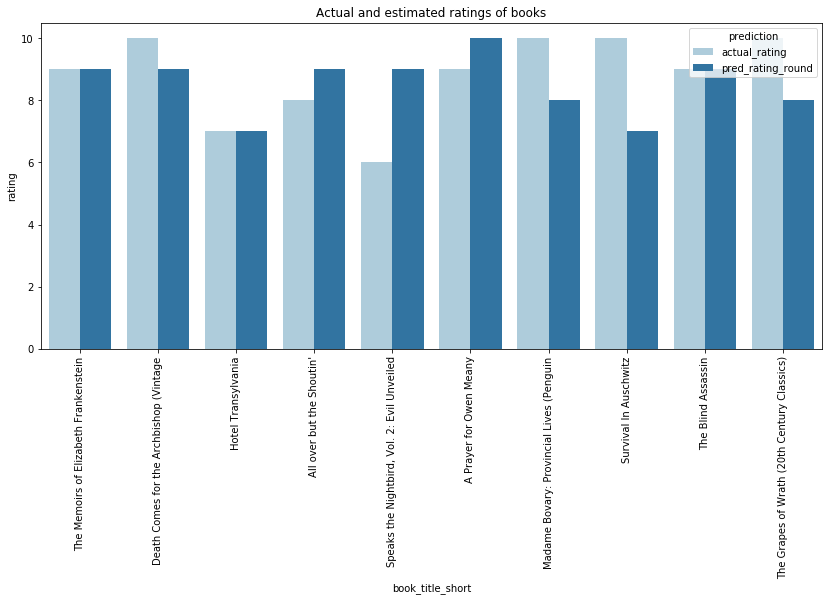

In [57]:
df_pred_sample = df_pred_user[df_pred_user['pred_rating_round'].notna()].sample(10)
df_pred_sample = pd.melt(df_pred_sample[['book_title_short', 'actual_rating', 'pred_rating_round']], id_vars='book_title_short', var_name='prediction', value_name='rating')

fig, ax = plt.subplots(figsize=(14, 6))

sns.barplot(x='book_title_short', y='rating', hue='prediction', data=df_pred_sample, palette=sns.color_palette("Paired"))
ax.set_title('Actual and estimated ratings of books')
plt.xticks(rotation=90)

plt.show()